# Decodificando la estructura secundaria de COVID-19 con Python y Pandas

* * *

### 1)  ¿Qué es el ARN ?


|  ![Fosfato](Imagenes/fosfato.png) | ![Ribosa](Imagenes/ribosa.png) | ![Base nitrogenada](Imagenes/bases_nitrogenadas.png) | ![ARN](Imagenes/RAD.png) |
|:-:|:-:|:-:|:-:|
|  Grupo fosfato | Azúcar de ribosa | Base nitrogenada  | ARN VS ADN   |


La molécula de ácido ribonucleico (ARN) desempeña funciones fundamentales en biología, incluida la transmisión de información genética, la regulación de la expresión génica y la catálisis de reacciones bioquímicas. Muchas moléculas de ARN o sus partes (dominios o motivos) se pliegan en estructuras tridimensionales (3D) estables que definen, al menos parcialmente, su capacidad de interactuar con otras moléculas y llevar a cabo sus tareas dentro de la célula.


### 2)  ¿Cuáles son los niveles de organización del ARN ?


|  ![Fosfato](Imagenes/nucleotidos.png) | ![Ribosa](Imagenes/secundaria.png) | ![Base nitrogenada](Imagenes/terciaria.gif) |
|:-:|:-:|:-:|
|  Primaria | Secundaria | Terciaria  |


La molécula de ARN de una sola cadena, para poder ejercer una función necesita adoptar una estructura específica. La estructura primaria es la secuencia lineal de nucleótidos de Adenina, Guanina , Citosina y Uracilo. La estructura secundaria son todos los elementos de asa y horquilla, las bases desapareadas, bucles y estructuras centroides que se forman a partir de las interacciones por puentes de hidrógeno que se dan entre pares de bases nitrogenadas. La estructura terciaria es la conformación tridimensional de la molécula de ARN, esta emerge de las interacciones entre estructuras secundarias. Como el ARN está cargado negativamente, se necesitan iones metálicos como Mg2 + para estabilizar muchas estructuras secundarias y terciarias.

### 2) ¿Cómo modelamos la estructura secundaria del ARN?

|  AAAUAGGCUAUA | ![zucker](Imagenes/zucker.png)  | (((..((((...)))).))) | ![HAIRPIN](Imagenes/hairpin.png)|
|:-:|:-:|:-:|:-:|
| Tomamos una secuencia de ARN  | Definimos parámetros e interacciones| Construimos modelo en notacion de brackets  |Simulamos la estructura secundaria| 

* * *


### 3)  ¿Por qué modelar la estructura secundaria del ARN  de COVID19?


|  ![Fosfato](Imagenes/coronavirus.jpeg) | ![Ribosa](Imagenes/rnam.png) | ![Base nitrogenada](Imagenes/pepe.png) |
|:-:|:-:|:-:|
|  Coronavirus | ARNm | ?  |


La estructura secundaria del ARN mensajero desempeña un papel importante en la biosíntesis de proteínas. Su impacto negativo en la traducción puede reducir la tasa de síntesis de una proteína al alentar o boquear el inicio y el movimiento de los ribosomas a lo largo del ARNm, convirtiéndose en un factor importante en la regulación de la expresión génica. Varios algoritmos pueden predecir la formación de estructuras secundarias calculando la energía libre mínima de las secuencias de ARN, o hallar una secuencia de ARN para una estructura dada. Si se aumenta la formación de  estructuras secundarias de ARNm  en COVID19 se puede disminuir la tasa a la que se sintetizan sus proteínas, haciendo menos efectivo su ciclo infectivo. 


### El objetivo de este taller es:

Aprender a usar el cálculo de la MFE para predecir cambios en la estructura del ARN

### El caso de hoy:

Eres un biohacker que acaba de descubir un nuevo medicamento que tiene la habilidad de generar que las moléculas del ARN de coronavirus puedan aparearse de manera extraña. ¿Lograrás reducir la tasa de síntesis de su proteína RdRp?

![pepeee](Imagenes/pepescientist.jpeg)

## Paso 0: Instala las siguientes librerías

In [ ]:
#conda install pandas
#conda install -c bioconda viennarna
#pip install --upgrade forgi

## Paso 1: Abrimos la secuencia del genoma de COVID-19 en formato fasta

La función readgenome se encarga de "leer" la secuencia del genoma de COVID19 tal y como fue descargada de la base de datos del Instituto nacional de información para biotecnología (NCBI). En este recuadro, COVID19.fasta es la secuencia en formato fasta.

In [1]:
def readgenome(filename):
    genome =''
    with open(filename,'r')as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readgenome('COVID19.fasta')
print("Largo en pb del genoma de COVID-19:",len(genome))
print("Secuencia de ADN:",genome)


Largo en pb del genoma de COVID-19: 29903
Secuencia de ADN: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAG

## Paso 2: Generamos la secuencia de ARN a partir de la secuencia de ADN

In [2]:
rna= ""
# Genera un archivo tipo string vacío en donde luego se guardara la secuencia de ARN
for i in genome:
    # Reemplaza todos los nucelótidos de Timina (T) con Uracilo (U)
    if i == "T":
        rna += "U"
    else:
        rna += i

# Imprime el string de ARN
print( "Secuencia de ARN: ", rna)

Secuencia de ARN:  AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGC

## Paso 3: Calculamos la MFE de la secuencia de ARN del dominio orf1ab de COVID-19

Calculamos la energía mínima de plegamiento del genoma de COVID19 a través de un análisis de ventana corrediza, con un tamaño de ventana de 100 nt y saltos de 1 nt. Su MFE se calcula en los primeros 21555 nt porque en esta region se encuentra el dominio de la proteína Rdrp.**

</pre>
### Para efecto práctico de este taller solo tomaremos en cuenta los primeros 1000 nucleótidos

In [3]:
# Dominio de un orf1ab que sintetiza una poli-proteina  que contiene a Rdrp
YP_009724389_1 = rna[0:1000]
# en realidad es 21555
print('YP_009724389_1:',len(YP_009724389_1))
rna=YP_009724389_1 

YP_009724389_1: 1000


In [6]:
import RNA
fin=0
def sliding_window_analysis(genome,function, window_size=100, step_size=1):
    """Devuelve un iterador que produce tuplas (inicio, fin, propiedad).
    Donde start y end son los índices utilizados para dividir la lista de entrada
    y function es el valor de retorno de la función dada la división
    lista.
    """
    for start in range(0, len(genome), step_size):
        end = start + window_size
        if end > len(genome):
            break
        yield start, end, function(genome[start:end])

    for start in range(0, len(genome), window_size):
        end = start + window_size
        if end > len(genome):
            break
        yield start, end, function(genome[start:end])
        
        
def fold_energy(genome):
    'Devuelve la energía de plegamiento de la secuencia de cada ventana'
    'Devuelve la energía de plegamiento de la secuencia de cada ventana'
    import RNA
    from RNA import params_load
    params_load('rna_turner2004.par') 
    RNA.cvar.dangles = 0
    
    fc = RNA.fold_compound(genome)
    #Estas funciones calculan la estructura secundaria en notacion de brackets y la MFE
    # Particularmente, la MFE compuesta, es decir de todas las conformaciones de RNA posibles 
    # es decir te da la MFE promedio de todas las estructuras secundarias potenicales a partir de una secuencia
    (mfe_struct, mfe) = fc.mfe()
    fc.exp_params_rescale(mfe)
    #Esto genera la funcionde particion que forma parte del calculo de la MFE compuesta(promedio)
    (pp, pf) = fc.pf()
    comp_fe=pf
    fin=pf
    return fin

In [7]:
for start, end, fin in sliding_window_analysis(rna,fold_energy):
    print(start,end,fin)

0 100 -12.448399543762207
1 101 -12.855801582336426
2 102 -15.001521110534668
3 103 -15.087671279907227
4 104 -15.717804908752441
5 105 -15.897614479064941
6 106 -18.10994529724121
7 107 -16.59292221069336
8 108 -16.972373962402344
9 109 -17.195308685302734
10 110 -17.175643920898438
11 111 -17.170909881591797
12 112 -17.19753074645996
13 113 -16.023357391357422
14 114 -15.292001724243164
15 115 -15.213890075683594
16 116 -15.25794792175293
17 117 -15.423500061035156
18 118 -15.70173168182373
19 119 -15.711257934570312
20 120 -15.70166015625
21 121 -15.555488586425781
22 122 -15.52292251586914
23 123 -16.087146759033203
24 124 -17.018218994140625
25 125 -19.726490020751953
26 126 -21.331207275390625
27 127 -23.884889602661133
28 128 -23.90715217590332
29 129 -23.935518264770508
30 130 -24.09176254272461
31 131 -24.101909637451172
32 132 -24.143396377563477
33 133 -24.147991180419922
34 134 -24.159650802612305
35 135 -24.199356079101562
36 136 -24.332887649536133
37 137 -24.332689285278

302 402 -34.68913650512695
303 403 -33.066322326660156
304 404 -31.875486373901367
305 405 -31.710105895996094
306 406 -31.708330154418945
307 407 -31.706565856933594
308 408 -31.624876022338867
309 409 -31.752470016479492
310 410 -33.01543045043945
311 411 -32.99161148071289
312 412 -32.88462829589844
313 413 -33.1504020690918
314 414 -34.282039642333984
315 415 -33.805355072021484
316 416 -33.91504669189453
317 417 -34.76232147216797
318 418 -36.60801696777344
319 419 -36.48488998413086
320 420 -34.47682571411133
321 421 -33.94849395751953
322 422 -34.923683166503906
323 423 -35.611873626708984
324 424 -35.6174201965332
325 425 -35.6895751953125
326 426 -36.22664260864258
327 427 -36.224281311035156
328 428 -35.672420501708984
329 429 -35.61172103881836
330 430 -34.91535186767578
331 431 -33.94135284423828
332 432 -33.78166198730469
333 433 -33.782779693603516
334 434 -33.089141845703125
335 435 -32.3744010925293
336 436 -30.859689712524414
337 437 -30.67449951171875
338 438 -30.6639

603 703 -25.954675674438477
604 704 -27.2534122467041
605 705 -27.25461196899414
606 706 -27.207204818725586
607 707 -28.1605224609375
608 708 -27.69573211669922
609 709 -27.72002410888672
610 710 -29.237628936767578
611 711 -29.436647415161133
612 712 -29.033212661743164
613 713 -28.946796417236328
614 714 -29.11709213256836
615 715 -29.406564712524414
616 716 -29.127145767211914
617 717 -28.88772201538086
618 718 -28.96971321105957
619 719 -28.729021072387695
620 720 -28.237340927124023
621 721 -28.175622940063477
622 722 -28.203018188476562
623 723 -29.274415969848633
624 724 -30.786813735961914
625 725 -31.771270751953125
626 726 -29.987937927246094
627 727 -29.954439163208008
628 728 -29.898378372192383
629 729 -30.471799850463867
630 730 -31.260290145874023
631 731 -33.688472747802734
632 732 -31.255327224731445
633 733 -30.382789611816406
634 734 -29.149051666259766
635 735 -28.889902114868164
636 736 -29.17758560180664
637 737 -29.302156448364258
638 738 -29.35892677307129
639 

0 100 -12.448399543762207
100 200 -21.585538864135742
200 300 -23.653871536254883
300 400 -36.41936111450195
400 500 -30.845834732055664
500 600 -22.5571231842041
600 700 -23.63319969177246
700 800 -19.36956214904785
800 900 -20.790252685546875
900 1000 -25.334604263305664


## Paso 4: Guardamos nuestros resultados en un archivo CSV

In [ ]:
def save_csv(file):
    file ='orf1ab_foldE_100.csv'
    with open(file,'w')as file_handle:
        header = "start,middle,end,folding_energy_potential\n"
        file_handle.write(header)
        for start, end, fin in sliding_window_analysis(rna,fold_energy):
            middle = (start + end ) / 2
            row = "{},{},{},{}\n".format(start, middle, end, fin)
            file_handle.write(row) 
    return(file)   
files=''
save_csv(files)

## Paso 5: Cambiamos los parámetros iniciales de simulación para  armar el modelo "Dummy"

In [4]:
fin=0
def sliding_window_analysis(genome,function, window_size=100, step_size=1):
    """Devuelve un iterador que produce tuplas (inicio, fin, propiedad).
    Donde start y end son los índices utilizados para dividir la lista de entrada
    y function es el valor de retorno de la función dada la división
    lista.
    """
    for start in range(0, len(genome), step_size):
        end = start + window_size
        if end > len(genome):
            break
        yield start, end, function(genome[start:end])

    for start in range(0, len(genome), window_size):
        end = start + window_size
        if end > len(genome):
            break
        yield start, end, function(genome[start:end])
        
        
def fold_energy(genome):
    'Devuelve la energía de plegamiento de la secuencia de cada ventana'
    import RNA     
    RNA.cvar.dangles = 0
# Estructura de datos que va a pasarse a la función para provocar el emparejamiento máximo en el modelo dummy
# con dos componentes:
# 1. Un modelo 'dummy' de plegamiento para evaluar la energía de los bucles sin restricciones 
#2. Un set nuevo de parámetros de energía
    mm_data = { 'dummy': RNA.fold_compound(genome), 'params': RNA.param() }
# Nearest Neighbor Parameter reversal functions
    revert_NN = { 
        RNA.DECOMP_PAIR_HP:       lambda i, j, k, l, f, p: - f.eval_hp_loop(i, j) - 500,
        RNA.DECOMP_PAIR_IL:       lambda i, j, k, l, f, p: - f.eval_int_loop(i, j, k, l) - 500,
        RNA.DECOMP_PAIR_ML:       lambda i, j, k, l, f, p: - p.MLclosing - p.MLintern[0] - (j - i - k + l - 2) * p.MLbase - 100,
        RNA.DECOMP_ML_ML_STEM:    lambda i, j, k, l, f, p: - p.MLintern[0] - (l - k - 1) * p.MLbase,
        RNA.DECOMP_ML_STEM:       lambda i, j, k, l, f, p: - p.MLintern[0] - (j - i - k + l) * p.MLbase,
        RNA.DECOMP_ML_ML:         lambda i, j, k, l, f, p: - (j - i - k + l) * p.MLbase,
        RNA.DECOMP_ML_ML_ML:      lambda i, j, k, l, f, p: 0,
        RNA.DECOMP_ML_UP:         lambda i, j, k, l, f, p: - (j - i + 1) * p.MLbase,
        RNA.DECOMP_EXT_STEM:      lambda i, j, k, l, f, p: - f.E_ext_loop(k, l),
        RNA.DECOMP_EXT_EXT:       lambda i, j, k, l, f, p: 0,
        RNA.DECOMP_EXT_STEM_EXT:  lambda i, j, k, l, f, p: - f.E_ext_loop(i, k),
        RNA.DECOMP_EXT_EXT_STEM:  lambda i, j, k, l, f, p: - f.E_ext_loop(l, j),
        RNA.DECOMP_EXT_EXT_STEM1: lambda i, j, k, l, f, p: - f.E_ext_loop(l, j-1),
            }
# Funcion de emparejamiento máximo que llama la libreria RNA
    def MaximumMatching(i, j, k, l, d, data):
        return revert_NN[d](i, j, k, l, data['dummy'], data['params'])
# Hace un elemento compuesto 
    fc = RNA.fold_compound(genome)
# Adiciona el emparejamiento maximo entre pares de bases
    fc.sc_add_f(MaximumMatching)
    fc.sc_add_data(mm_data, None)
# llama el agoritmo propio de RNAfold para calcular la MFE
    (s, mm) = fc.mfe()
    fin=mm
    return fin


In [5]:
for start, end, fin in sliding_window_analysis(rna,fold_energy):
    print(start,end,fin)

0 100 -170.5
1 101 -170.5
2 102 -170.5
3 103 -170.0
4 104 -170.5
5 105 -170.5
6 106 -175.0
7 107 -175.0
8 108 -175.0
9 109 -170.0
10 110 -170.0
11 111 -170.0
12 112 -170.0
13 113 -165.5
14 114 -166.0
15 115 -170.0
16 116 -170.0
17 117 -170.0
18 118 -170.0
19 119 -170.0
20 120 -170.5
21 121 -170.5
22 122 -170.0
23 123 -170.0
24 124 -170.0
25 125 -165.0
26 126 -165.0
27 127 -170.0
28 128 -170.5
29 129 -170.5
30 130 -175.0
31 131 -175.0
32 132 -175.5
33 133 -180.0
34 134 -175.5
35 135 -175.5
36 136 -180.0
37 137 -180.0
38 138 -180.0
39 139 -179.5
40 140 -179.5
41 141 -175.5
42 142 -175.5
43 143 -175.5
44 144 -180.0
45 145 -179.5
46 146 -180.0
47 147 -180.0
48 148 -180.0
49 149 -180.0
50 150 -180.0
51 151 -175.5
52 152 -175.5
53 153 -175.5
54 154 -175.5
55 155 -175.5
56 156 -175.5
57 157 -175.0
58 158 -180.0
59 159 -180.0
60 160 -185.0
61 161 -185.0
62 162 -180.0
63 163 -175.5
64 164 -180.0
65 165 -180.5
66 166 -180.0
67 167 -180.0
68 168 -185.0
69 169 -185.0
70 170 -185.0
71 171 -180.0
72

554 654 -190.0
555 655 -190.0
556 656 -190.0
557 657 -190.0
558 658 -190.0
559 659 -185.0
560 660 -185.0
561 661 -190.0
562 662 -185.0
563 663 -185.0
564 664 -185.0
565 665 -190.0
566 666 -190.0
567 667 -190.0
568 668 -185.0
569 669 -185.0
570 670 -185.0
571 671 -185.5
572 672 -185.0
573 673 -185.0
574 674 -185.5
575 675 -185.5
576 676 -185.0
577 677 -185.0
578 678 -186.0
579 679 -181.0
580 680 -185.0
581 681 -181.0
582 682 -180.0
583 683 -180.0
584 684 -180.0
585 685 -180.0
586 686 -175.0
587 687 -175.0
588 688 -175.5
589 689 -175.0
590 690 -175.0
591 691 -175.0
592 692 -175.0
593 693 -175.0
594 694 -180.0
595 695 -175.5
596 696 -175.5
597 697 -175.5
598 698 -180.5
599 699 -175.5
600 700 -175.0
601 701 -175.0
602 702 -175.0
603 703 -180.0
604 704 -180.0
605 705 -180.5
606 706 -180.0
607 707 -185.0
608 708 -180.0
609 709 -180.0
610 710 -185.0
611 711 -185.0
612 712 -185.0
613 713 -185.0
614 714 -185.0
615 715 -185.5
616 716 -185.0
617 717 -185.0
618 718 -180.5
619 719 -185.5
620 720 -1

## Paso 6: Guardamos resultados

In [ ]:
def save_csv(file):
    file ='drunk_foldE_100.csv'
    with open(file,'w')as file_handle:
        header = "start,middle,end,folding_energy_potential\n"
        file_handle.write(header)
        for start, end, fin in sliding_window_analysis(rna,fold_energy):
            middle = (start + end ) / 2
            row = "{},{},{},{}\n".format(start, middle, end, fin)
            file_handle.write(row) 
    return(file)   
files=''
save_csv(files)

## Paso 7: Graficamos el cambio de MFE por ventana para cada resultado CSV

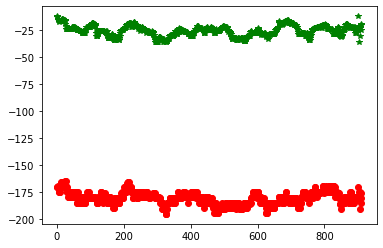

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('orf1ab_foldE_100.csv')
df2=pd.read_csv('drunk_foldE_100.csv')

middle_list = df.middle.tolist()
orf1ab_list = df.folding_energy_potential.tolist()
drunk_list= df2.folding_energy_potential.tolist()
x=middle_list
y=orf1ab_list
y1=drunk_list
# El eje Y es la MFE de una ventana
#El eje X es el punto medio de una ventana

plt.plot(y,'g*', y1, 'ro')
plt.show()


# Y ....¿Qué paso con simular?

## Paso 8: Manipulación de resultados

Ahora manipularemos nuestros resultados , para observar cambios en la estructura secundaria del ARN. Seleccionaremos solo la ventana más negativa de COVID-19 y la ventana más negativa de COVID_drunk para simular su estructura secundaria en notación de brackets, para posteriormente visualizar ambas estructuras y apreciar los cambios al mover los parámetros iniciales de la simulación

In [10]:
# ed llama a nuestro archivo CSV de COVID-19 y nos devuelve una lista de valores
#sort los ordena de mayor a menor, sin importar que sean negativos
ed=df.sort_values('folding_energy_potential')
e=ed.head(10)
print(e)

     start  middle  end  folding_energy_potential
318    318   368.0  418                -36.608017
298    298   348.0  398                -36.577808
297    297   347.0  397                -36.518696
296    296   346.0  396                -36.516998
295    295   345.0  395                -36.509724
319    319   369.0  419                -36.484890
294    294   344.0  394                -36.433056
299    299   349.0  399                -36.428524
904    300   350.0  400                -36.419361
300    300   350.0  400                -36.419361


In [11]:
# adllama a nuestro archivo CSV de COVID dummy(drunk) y nos devuelve una lista de valores
#sort los ordena de mayor a menor, sin importar que sean negativos
ad=df2.sort_values('folding_energy_potential')
asd=ad.head(10)
print(asd)

     start  middle  end  folding_energy_potential
327    327   377.0  427                    -195.5
325    325   375.0  425                    -195.5
326    326   376.0  426                    -195.5
625    625   675.0  725                    -195.0
472    472   522.0  572                    -195.0
481    481   531.0  581                    -195.0
482    482   532.0  582                    -195.0
626    626   676.0  726                    -195.0
627    627   677.0  727                    -195.0
628    628   678.0  728                    -195.0


## Paso 9: Encontramos la estructuras secundarias en notación de brackets

In [12]:
#Computamos la estructura secundaria de RNA de COVID-19
import RNA
s=rna[318:418]

(ss, mfe) = RNA.fold(s)
# print output
print("%s\n%s (%6.2f)" % (s, ss, mfe))

GCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGU
((((((...))))))..((((.((((.((((((((.(((((((((((((.....))).)))))..))))).))))).............))))))))))) (-35.20)


In [13]:
#Computamos la estructura secundaria de RNA del modelo dummy de COVID-19, usando los parámetros dummy
import RNA
s=rna[318:418]

seq1 = s
RNA.cvar.dangles = 0
mm_data = { 'dummy': RNA.fold_compound(seq1), 'params': RNA.param() }
revert_NN = { 
    RNA.DECOMP_PAIR_HP:       lambda i, j, k, l, f, p: - f.eval_hp_loop(i, j) - 500,
    RNA.DECOMP_PAIR_IL:       lambda i, j, k, l, f, p: - f.eval_int_loop(i, j, k, l) - 500,
    RNA.DECOMP_PAIR_ML:       lambda i, j, k, l, f, p: - p.MLclosing - p.MLintern[0] - (j - i - k + l - 2) * p.MLbase - 100,
    RNA.DECOMP_ML_ML_STEM:    lambda i, j, k, l, f, p: - p.MLintern[0] - (l - k - 1) * p.MLbase,
    RNA.DECOMP_ML_STEM:       lambda i, j, k, l, f, p: - p.MLintern[0] - (j - i - k + l) * p.MLbase,
    RNA.DECOMP_ML_ML:         lambda i, j, k, l, f, p: - (j - i - k + l) * p.MLbase,
    RNA.DECOMP_ML_ML_ML:      lambda i, j, k, l, f, p: 0,
    RNA.DECOMP_ML_UP:         lambda i, j, k, l, f, p: - (j - i + 1) * p.MLbase,
    RNA.DECOMP_EXT_STEM:      lambda i, j, k, l, f, p: - f.E_ext_loop(k, l),
    RNA.DECOMP_EXT_EXT:       lambda i, j, k, l, f, p: 0,
    RNA.DECOMP_EXT_STEM_EXT:  lambda i, j, k, l, f, p: - f.E_ext_loop(i, k),
    RNA.DECOMP_EXT_EXT_STEM:  lambda i, j, k, l, f, p: - f.E_ext_loop(l, j),
    RNA.DECOMP_EXT_EXT_STEM1: lambda i, j, k, l, f, p: - f.E_ext_loop(l, j-1),
            }
def MaximumMatching(i, j, k, l, d, data):
    return revert_NN[d](i, j, k, l, data['dummy'], data['params'])

fc = RNA.fold_compound(seq1)
fc.sc_add_f(MaximumMatching)
fc.sc_add_data(mm_data, None)
(s, mm) = fc.mfe()
print("%s\n%s (MM: %d)\n" %  (seq1, s, mm))


GCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGU
((((((...))))))..((((.((((.((((((((.(((((((((((((.....)).))).)).)).)))))))))..))((((...))))))))))))) (MM: -190)



## Paso 10: Simulamos la estructuras secundarias 

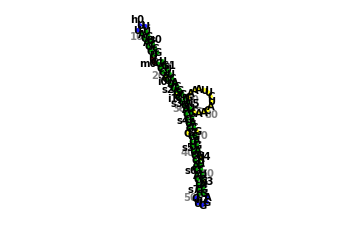

In [14]:
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
import forgi
cg = forgi.load_rna("corona.fx", allow_many=False)
fvm.plot_rna(cg, text_kwargs={"fontweight":"black"}, lighten=0.1,
             backbone_kwargs={"linewidth":1})
plt.show()

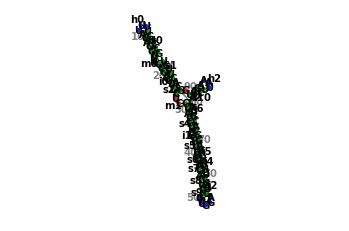

In [15]:
import matplotlib.pyplot as plt
import forgi.visual.mplotlib as fvm
import forgi
cg = forgi.load_rna("drunk.fx", allow_many=False)
fvm.plot_rna(cg, text_kwargs={"fontweight":"black"}, lighten=0.1,
             backbone_kwargs={"linewidth":1})
plt.show()

## ¡Gracias!



![wohoo](Imagenes/thanks.jpg)